In [1]:
from keras.layers import Dense, Activation, Dropout, Conv1D, Flatten
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow 

### build model

In [3]:
model = Sequential()
#model.add(Conv1D(1024, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(7, 4096)))
#model.add(Conv1D(512, kernel_size=3, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Conv1D(1024, kernel_size=3, activation='relu', input_shape=(7, 4096)))
model.add(Conv1D(512, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(101))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 5, 1024)           12583936  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 512)            1573376   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               393472    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 101)               25957     
__________

In [5]:
BATCH_SIZE = 512

In [6]:
def generate_batch(x_samples, y_samples):
    num_batches = len(x_samples) // BATCH_SIZE

    while True:
        for batchIdx in range(0, num_batches):
            start = batchIdx * BATCH_SIZE
            end = (batchIdx + 1) * BATCH_SIZE
            yield np.array(x_samples[start:end]), y_samples[start:end]

In [7]:
x = np.load('xfe.npy',allow_pickle=True)
y = np.load('yfe.npy',allow_pickle=True)

In [8]:
x.shape

(13320, 7, 4096)

In [9]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3,random_state=25)

In [11]:
train_gen = generate_batch(Xtrain, Ytrain)
test_gen = generate_batch(Xtest, Ytest)

In [12]:
train_num_batches = len(Xtrain) // BATCH_SIZE
test_num_batches = len(Xtest) // BATCH_SIZE

In [13]:
checkpoint = ModelCheckpoint(filepath='weightscnn/model-ep{epoch:03d}-acc{acc:.3f}-val_acc{val_acc:.3f}.h5', save_best_only=True)

In [14]:
NUM_EPOCHS = 128

In [15]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=train_num_batches,
                              epochs=NUM_EPOCHS,
                              verbose=1, validation_data=test_gen, validation_steps=test_num_batches,
                              callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/128
18/18 [==============================] - 7s 366ms/step - loss: 8.8829 - acc: 0.0097 - val_loss: 4.5735 - val_acc: 0.0299
Epoch 2/128
18/18 [==============================] - 3s 158ms/step - loss: 4.5658 - acc: 0.0250 - val_loss: 4.4440 - val_acc: 0.0798
Epoch 3/128
18/18 [==============================] - 3s 162ms/step - loss: 4.4371 - acc: 0.0503 - val_loss: 4.0868 - val_acc: 0.1426
Epoch 4/128
18/18 [==============================] - 3s 163ms/step - loss: 4.1451 - acc: 0.1030 - val_loss: 3.6556 - val_acc: 0.2656
Epoch 5/128
18/18 [==============================] - 3s 158ms/step - loss: 3.7739 - acc: 0.1683 - val_loss: 3.3648 - val_acc: 0.3002
Epoch 6/128
18/18 [==============================] - 3s 160ms/step - loss: 3.4312 - acc: 0.2391 - val_loss: 2.8537 - val_acc: 0.3817
Epoch 7/128
18/18 [==============================] - 3s 171ms/step - loss: 3.0700 - acc: 0.3003 - val_loss: 2.5239 - val_acc: 0.4403
Epoch 8/128
18/18 [==

18/18 [==============================] - 3s 165ms/step - loss: 0.1110 - acc: 0.9809 - val_loss: 0.8638 - val_acc: 0.9107
Epoch 122/128
18/18 [==============================] - 3s 159ms/step - loss: 0.0673 - acc: 0.9863 - val_loss: 0.7966 - val_acc: 0.9194
Epoch 123/128
18/18 [==============================] - 3s 161ms/step - loss: 0.0656 - acc: 0.9871 - val_loss: 0.8779 - val_acc: 0.9143
Epoch 124/128
18/18 [==============================] - 3s 164ms/step - loss: 0.1068 - acc: 0.9818 - val_loss: 0.8191 - val_acc: 0.9199
Epoch 125/128
18/18 [==============================] - 3s 165ms/step - loss: 0.0764 - acc: 0.9850 - val_loss: 0.9376 - val_acc: 0.9085
Epoch 126/128
18/18 [==============================] - 3s 157ms/step - loss: 0.0656 - acc: 0.9889 - val_loss: 0.8149 - val_acc: 0.9166
Epoch 127/128
18/18 [==============================] - 3s 161ms/step - loss: 0.0927 - acc: 0.9845 - val_loss: 0.9259 - val_acc: 0.9040
Epoch 128/128
18/18 [==============================] - 3s 161ms/step 

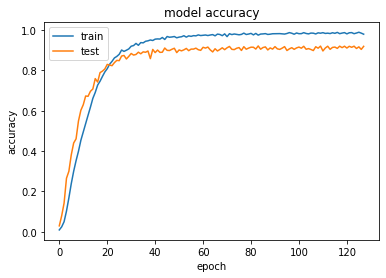

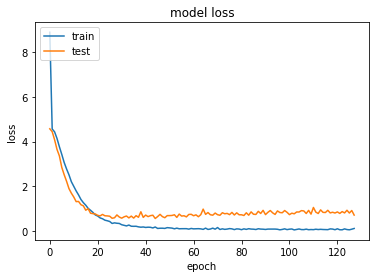

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()